In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.ensemble import RandomForestRegressor

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
from sklearn.metrics import r2_score,mean_squared_error

In [9]:
train_df=pd.read_csv('train_F3fUq2S.csv')


In [10]:
train_df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [11]:
train_df.tail()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
1883,1884,3,88,1451,75,2,0,Noon,2,11,...,0,0,1,0,0,0,0,0,10,0.350746
1884,1885,3,58,10537,40,2,0,Evening,2,11,...,0,0,0,0,0,0,0,0,11,0.004728
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,0,6,0.008289
1886,1887,3,58,10537,40,1,0,Evening,2,11,...,0,0,0,0,0,0,0,0,16,0.012014
1887,1888,3,89,11050,26,0,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.003644


In [12]:
train_df.shape

(1888, 22)

In [13]:
train_df.dtypes

campaign_id             int64
sender                  int64
subject_len             int64
body_len                int64
mean_paragraph_len      int64
day_of_week             int64
is_weekend              int64
times_of_day           object
category                int64
product                 int64
no_of_CTA               int64
mean_CTA_len            int64
is_image                int64
is_personalised         int64
is_quote                int64
is_timer                int64
is_emoticons            int64
is_discount             int64
is_price                int64
is_urgency              int64
target_audience         int64
click_rate            float64
dtype: object

In [14]:
train_df.isnull().sum()/len(train_df)

campaign_id           0.0
sender                0.0
subject_len           0.0
body_len              0.0
mean_paragraph_len    0.0
day_of_week           0.0
is_weekend            0.0
times_of_day          0.0
category              0.0
product               0.0
no_of_CTA             0.0
mean_CTA_len          0.0
is_image              0.0
is_personalised       0.0
is_quote              0.0
is_timer              0.0
is_emoticons          0.0
is_discount           0.0
is_price              0.0
is_urgency            0.0
target_audience       0.0
click_rate            0.0
dtype: float64

In [15]:
train_df.describe()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,...,1888.000000,1888.000000,1888.000000,1888.0,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,944.500000,4.395657,86.246292,14185.780191,35.239407,2.828390,0.199682,9.949682,17.525424,4.222458,...,0.909958,0.056674,0.834216,0.0,0.210805,0.039725,40.197034,0.112288,11.634534,0.041888
std,545.162973,3.277927,30.143206,7327.615307,28.139498,1.763193,0.399867,5.300719,12.369526,4.628348,...,0.866467,0.231279,1.033901,0.0,0.613442,0.195363,553.957470,0.315804,2.949121,0.084223
min,1.000000,0.000000,9.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472.750000,3.000000,69.000000,9554.500000,21.000000,1.000000,0.000000,6.000000,9.000000,2.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.005413
50%,944.500000,3.000000,83.000000,12689.000000,29.000000,3.000000,0.000000,10.000000,12.000000,3.000000,...,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.010686
75%,1416.250000,3.000000,98.000000,17351.500000,40.000000,4.000000,0.000000,15.000000,27.250000,5.000000,...,2.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.035589
max,1888.000000,15.000000,265.000000,44491.000000,286.000000,6.000000,1.000000,15.000000,43.000000,49.000000,...,6.000000,1.000000,6.000000,0.0,6.000000,1.000000,14999.000000,1.000000,16.000000,0.897959


In [16]:
train_df.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [18]:
train_df.drop_duplicates(inplace=True)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='click_rate', ylabel='Density'>

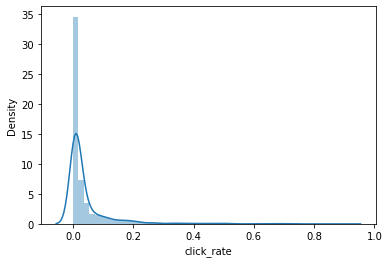

In [19]:
sns.distplot(train_df['click_rate'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subject_len'>

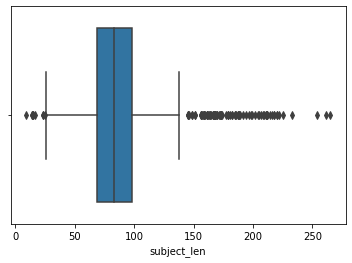

In [20]:
sns.boxplot(train_df['subject_len'])

In [21]:
q1=train_df['subject_len'].quantile(0.25)

In [22]:
q3=train_df['subject_len'].quantile(0.75)

In [23]:
IQR=q3-q1

In [24]:
lower=q1-1.5*IQR

In [25]:
upper=q1+1.5*IQR

In [26]:
train_df=train_df[(train_df['subject_len']>lower) & (train_df['subject_len']<upper)]

In [27]:
train_df

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,1884,3,88,1451,75,2,0,Noon,2,11,...,0,0,1,0,0,0,0,0,10,0.350746
1884,1885,3,58,10537,40,2,0,Evening,2,11,...,0,0,0,0,0,0,0,0,11,0.004728
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,0,6,0.008289
1886,1887,3,58,10537,40,1,0,Evening,2,11,...,0,0,0,0,0,0,0,0,16,0.012014


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='body_len'>

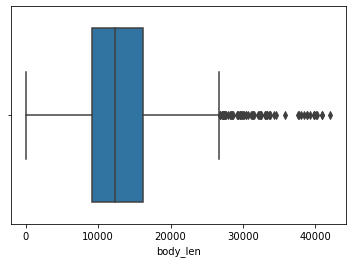

In [28]:
sns.boxplot(train_df['body_len'])

In [29]:
q1=train_df['body_len'].quantile(0.25)

In [30]:
q3=train_df['body_len'].quantile(0.75)

In [31]:
IQR=q3-q1

In [32]:
lower=q1-1.5*IQR

In [33]:
upper=q1+1.5*IQR

In [34]:
train_df=train_df[(train_df['body_len']>lower) & (train_df['body_len']<upper)]

In [35]:
train_df

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,1884,3,88,1451,75,2,0,Noon,2,11,...,0,0,1,0,0,0,0,0,10,0.350746
1884,1885,3,58,10537,40,2,0,Evening,2,11,...,0,0,0,0,0,0,0,0,11,0.004728
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,0,6,0.008289
1886,1887,3,58,10537,40,1,0,Evening,2,11,...,0,0,0,0,0,0,0,0,16,0.012014


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_paragraph_len'>

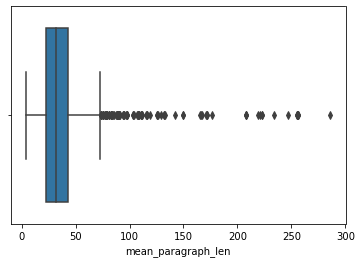

In [36]:
sns.boxplot(train_df['mean_paragraph_len'])

In [37]:
q1=train_df['mean_paragraph_len'].quantile(0.25)

In [38]:
q3=train_df['mean_paragraph_len'].quantile(0.75)

In [39]:
IQR=q3-q1

In [40]:
lower=q1-1.5*IQR

In [41]:
upper=q1+1.5*IQR

In [42]:
train_df=train_df[(train_df['mean_paragraph_len']>lower) & (train_df['mean_paragraph_len']<upper)]

In [43]:
train_df

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826
7,8,3,60,12117,17,4,0,Noon,6,26,...,1,0,1,0,0,0,0,0,14,0.166998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,1883,3,74,10535,40,3,0,Evening,2,11,...,0,0,0,0,0,0,0,0,15,0.002748
1884,1885,3,58,10537,40,2,0,Evening,2,11,...,0,0,0,0,0,0,0,0,11,0.004728
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,0,6,0.008289
1886,1887,3,58,10537,40,1,0,Evening,2,11,...,0,0,0,0,0,0,0,0,16,0.012014


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_CTA'>

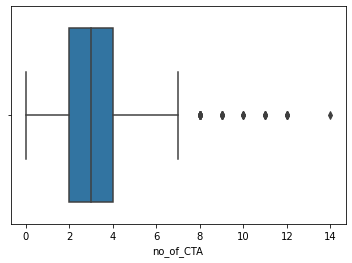

In [44]:
sns.boxplot(train_df['no_of_CTA'])

In [45]:
q1=train_df['no_of_CTA'].quantile(0.25)

In [46]:
q3=train_df['no_of_CTA'].quantile(0.75)

In [47]:
IQR=q3-q1

In [48]:
lower=q1-1.5*IQR

In [49]:
upper=q1+1.5*IQR

In [50]:
train_df=train_df[(train_df['no_of_CTA']>lower) & (train_df['no_of_CTA']<upper)]

In [51]:
train_df

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826
7,8,3,60,12117,17,4,0,Noon,6,26,...,1,0,1,0,0,0,0,0,14,0.166998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,1875,3,74,10596,31,5,1,Noon,2,11,...,2,0,1,0,0,0,0,0,16,0.006033
1876,1877,3,100,9132,19,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,15,0.006598
1879,1880,3,74,10601,31,4,0,Evening,2,11,...,2,0,1,0,0,0,0,0,16,0.004249
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,0,6,0.008289


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_CTA_len'>

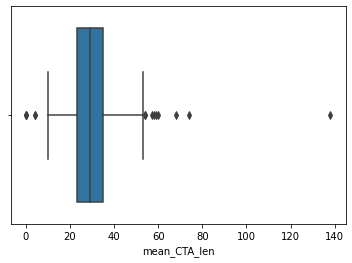

In [52]:
sns.boxplot(train_df['mean_CTA_len'])

In [53]:
q1=train_df['mean_CTA_len'].quantile(0.25)

In [54]:
q3=train_df['mean_CTA_len'].quantile(0.75)

In [55]:
IQR=q3-q1

In [56]:
lower=q1-1.5*IQR

In [57]:
upper=q1+1.5*IQR

In [58]:
train_df=train_df[(train_df['mean_CTA_len']>lower) & (train_df['mean_CTA_len']<upper)]

In [59]:
train_df

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826
7,8,3,60,12117,17,4,0,Noon,6,26,...,1,0,1,0,0,0,0,0,14,0.166998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,1875,3,74,10596,31,5,1,Noon,2,11,...,2,0,1,0,0,0,0,0,16,0.006033
1876,1877,3,100,9132,19,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,15,0.006598
1879,1880,3,74,10601,31,4,0,Evening,2,11,...,2,0,1,0,0,0,0,0,16,0.004249
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,0,6,0.008289


In [60]:
x=train_df.groupby('category')['click_rate'].mean().sort_values(ascending=False).index


In [61]:
y=train_df.groupby('category')['click_rate'].mean().sort_values(ascending=False).values


In [62]:
x

Int64Index([11, 10, 6, 2, 1, 9, 12, 13, 5, 15, 4, 3, 14], dtype='int64', name='category')

In [63]:
y

array([0.14894814, 0.08642617, 0.08474532, 0.08222805, 0.05533629,
       0.04826393, 0.0450693 , 0.02836304, 0.01975826, 0.01807615,
       0.01494563, 0.00259961, 0.00036236])

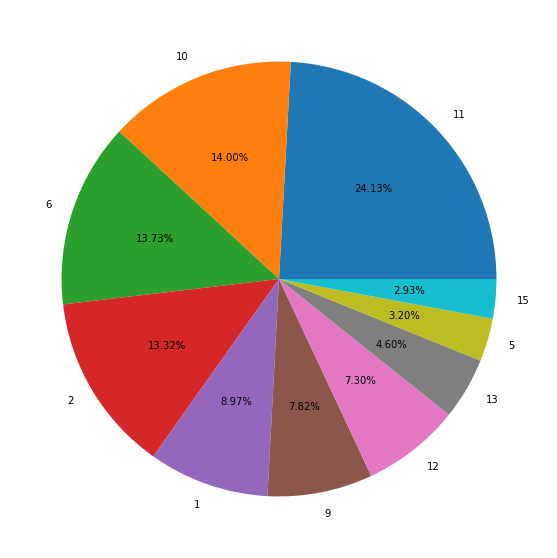

In [64]:
plt.figure(figsize=(10,10))
plt.pie(x=y[:10],labels=x[:10],autopct="%1.2f%%")
plt.show()

In [65]:
x=train_df.groupby('category')['click_rate'].mean().index


In [66]:
y=train_df.groupby('category')['click_rate'].mean().values


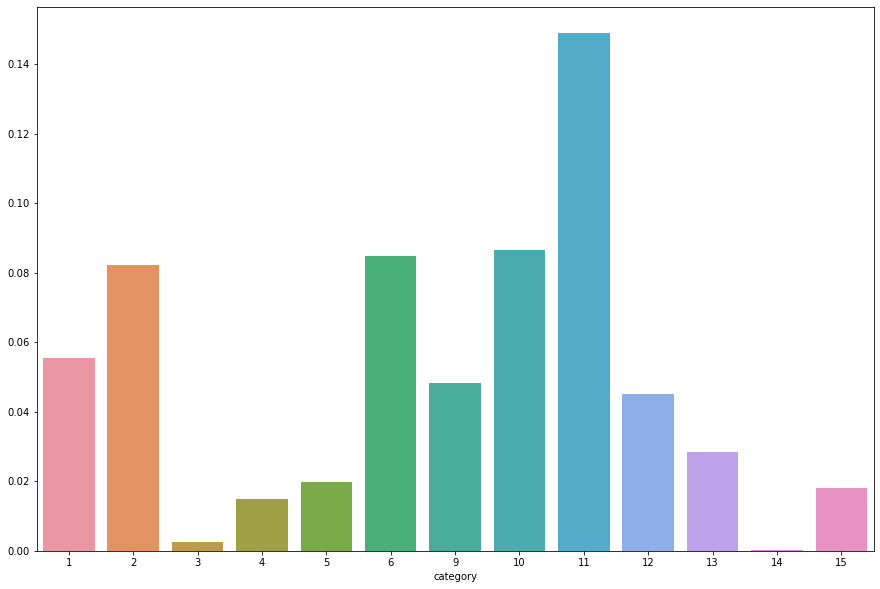

In [67]:
plt.figure(figsize=(15,10))
sns.barplot(x=x,y=y)
plt.show()

# Observations:
1. For Category 11, average number of clicks is maximum.
2. For Category 14, average number of clicks is minimum.

In [68]:
x=train_df.groupby('product')['click_rate'].mean().sort_values(ascending=False).index


In [69]:
y=train_df.groupby('product')['click_rate'].mean().sort_values(ascending=False).values


In [70]:
x

Int64Index([29, 22, 26, 38, 25, 14, 42, 37, 11, 23,  5,  8, 34, 21, 20, 12, 10,
            17, 24,  1, 28, 18, 41,  9, 16, 31,  6,  7, 13, 19, 39, 36,  3, 43,
            40, 33],
           dtype='int64', name='product')

In [71]:
y

array([0.17043356, 0.1487689 , 0.1341013 , 0.11560127, 0.11226939,
       0.09738314, 0.08642617, 0.08421833, 0.08222805, 0.06269838,
       0.05533629, 0.05375494, 0.04886009, 0.02836304, 0.02752965,
       0.0273715 , 0.0261816 , 0.01975826, 0.01924489, 0.01853168,
       0.01775077, 0.01747487, 0.0163102 , 0.01524682, 0.01494563,
       0.01419751, 0.01373236, 0.01330869, 0.01320704, 0.0129485 ,
       0.01010945, 0.01007651, 0.0061459 , 0.00259961, 0.00146628,
       0.00036236])

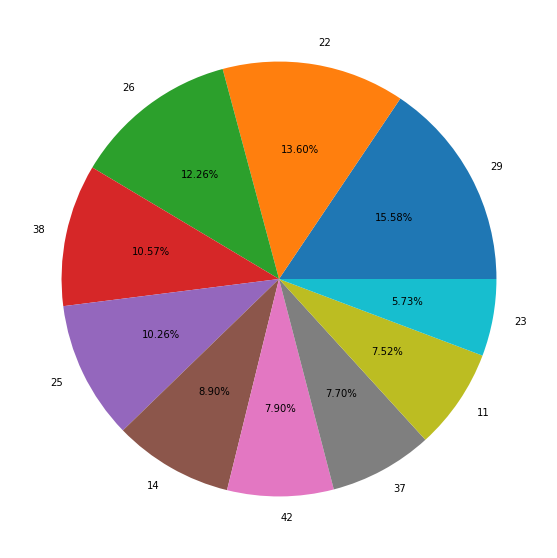

In [72]:
plt.figure(figsize=(10,10))
plt.pie(x=y[:10],labels=x[:10],autopct="%1.2f%%")
plt.show()

In [73]:
x=train_df.groupby('product')['click_rate'].mean().index


In [74]:
y=train_df.groupby('product')['click_rate'].mean().values


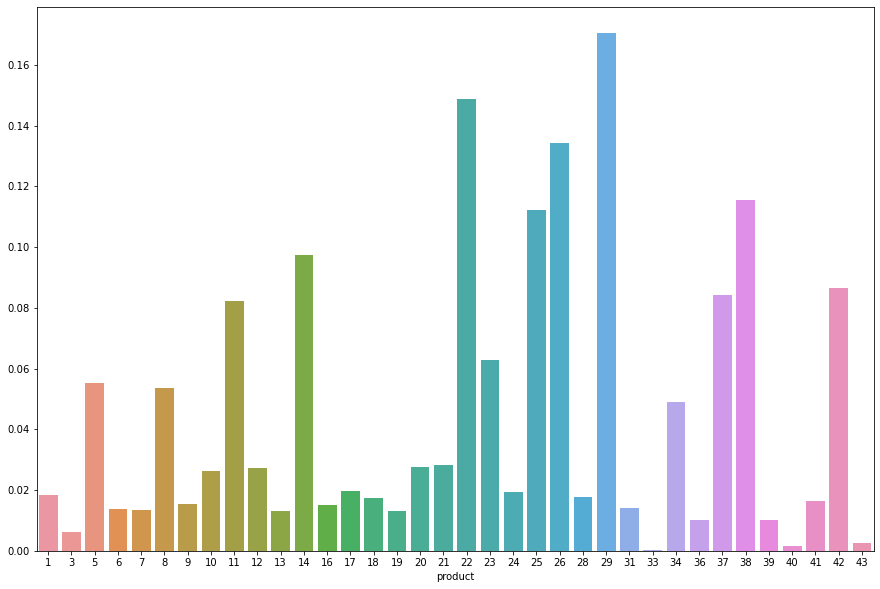

In [75]:
plt.figure(figsize=(15,10))
sns.barplot(x=x,y=y)
plt.show()

# Observations:
1. For product 29, average number of clicks is maximum.
2. For product 33, average number of clicks is minimum.

In [76]:
train_df

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826
7,8,3,60,12117,17,4,0,Noon,6,26,...,1,0,1,0,0,0,0,0,14,0.166998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,1875,3,74,10596,31,5,1,Noon,2,11,...,2,0,1,0,0,0,0,0,16,0.006033
1876,1877,3,100,9132,19,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,15,0.006598
1879,1880,3,74,10601,31,4,0,Evening,2,11,...,2,0,1,0,0,0,0,0,16,0.004249
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,0,6,0.008289


In [77]:
label_df=train_df.groupby(['day_of_week','times_of_day'])['click_rate'].mean().sort_values(ascending=False).index


In [78]:
val_df=train_df.groupby(['day_of_week','times_of_day'])['click_rate'].mean().sort_values(ascending=False).values


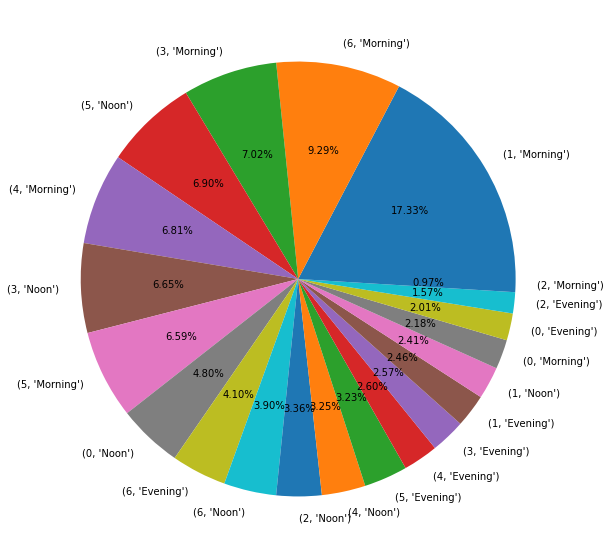

In [79]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [80]:
label_df=train_df.groupby(['is_weekend','times_of_day'])['click_rate'].mean().sort_values(ascending=False).index


In [81]:
val_df=train_df.groupby(['is_weekend','times_of_day'])['click_rate'].mean().sort_values(ascending=False).values


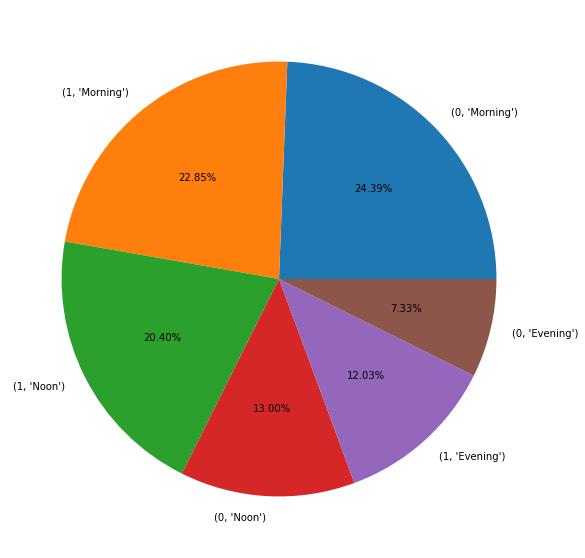

In [82]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. on weekday and weekend average number of clicks are maximum in morning
2. on weekday and weekend average number of clicks are minimum in evening.


<AxesSubplot:xlabel='is_weekend', ylabel='click_rate'>

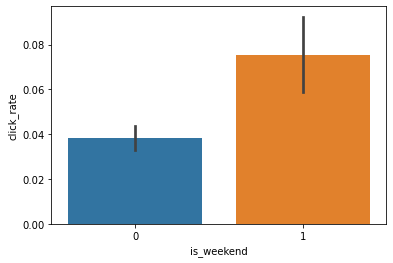

In [83]:
sns.barplot(x=train_df['is_weekend'],y=train_df['click_rate'])

# Observations:
1. on weekend average number of clicks are more.

<AxesSubplot:xlabel='day_of_week', ylabel='click_rate'>

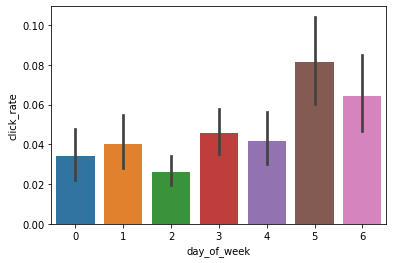

In [84]:
sns.barplot(x=train_df['day_of_week'],y=train_df['click_rate'])

# Observations:
1. on day 5 of week average number of clicks are maximum.
2. on day 2 of week average number of clicks are minimum.

In [85]:
x=train_df.groupby('day_of_week')['click_rate'].mean().sort_values(ascending=False).index


In [86]:
y=train_df.groupby('day_of_week')['click_rate'].mean().sort_values(ascending=False).values


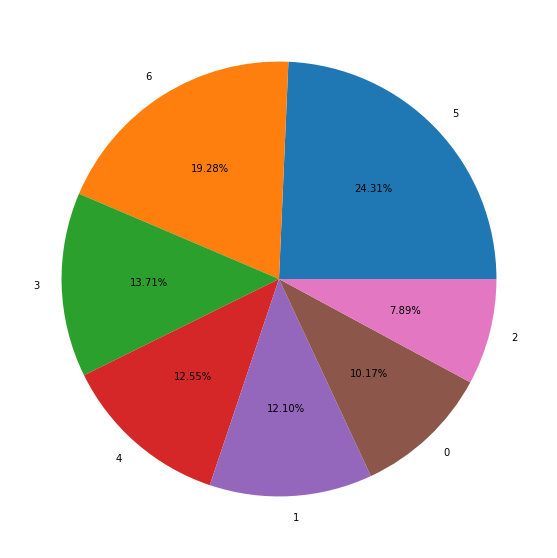

In [87]:
plt.figure(figsize=(10,10))
plt.pie(x=y,labels=x,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='times_of_day', ylabel='click_rate'>

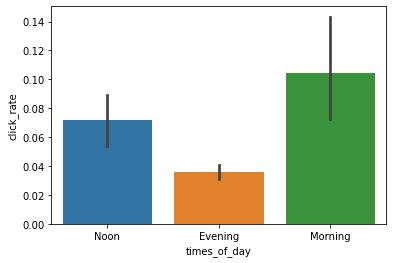

In [88]:
sns.barplot(x=train_df['times_of_day'],y=train_df['click_rate'])

# Observations:
1. In Morning time of day, average number of clicks are maximum.
2. In Evening time of day, average number of clicks are minimum.

In [89]:
x=train_df.groupby('times_of_day')['click_rate'].mean().sort_values(ascending=False).index


In [90]:
y=train_df.groupby('times_of_day')['click_rate'].mean().sort_values(ascending=False).values


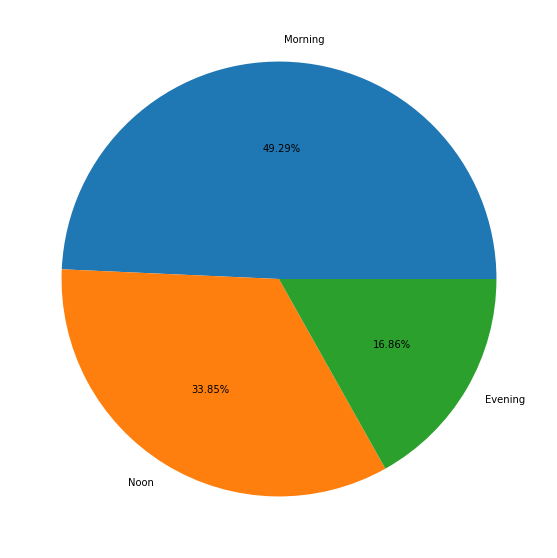

In [91]:
plt.figure(figsize=(10,10))
plt.pie(x=y,labels=x,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='is_image', ylabel='click_rate'>

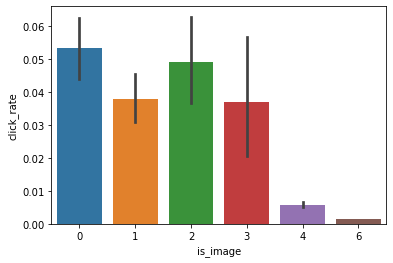

In [92]:
sns.barplot(x=train_df['is_image'],y=train_df['click_rate'])

# Observations:
1. In Morning time of day, average number of clicks are maximum.
2. In Evening time of day, average number of clicks are minimum.

In [93]:
x=train_df.groupby('is_image')['click_rate'].mean().sort_values(ascending=False).index


In [94]:
y=train_df.groupby('is_image')['click_rate'].mean().sort_values(ascending=False).values


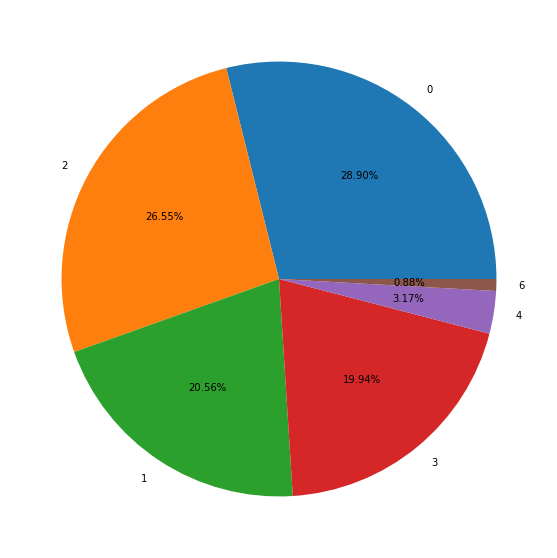

In [95]:
plt.figure(figsize=(10,10))
plt.pie(x=y,labels=x,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='is_quote', ylabel='click_rate'>

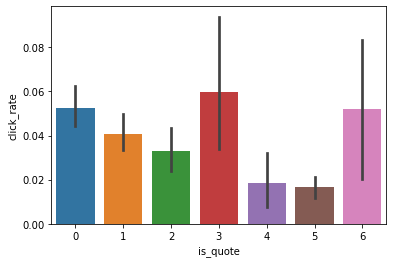

In [96]:
sns.barplot(x=train_df['is_quote'],y=train_df['click_rate'])

# Observations:
1. For quote 3, average number of clicks are maximum.
2. For quote 5, average number of clicks are minimum.

In [97]:
x=train_df.groupby('is_quote')['click_rate'].mean().sort_values(ascending=False).index


In [98]:
y=train_df.groupby('is_quote')['click_rate'].mean().sort_values(ascending=False).values


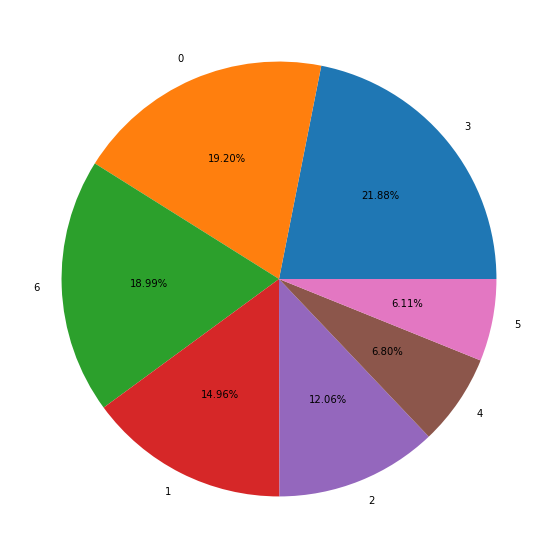

In [99]:
plt.figure(figsize=(10,10))
plt.pie(x=y,labels=x,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='is_emoticons', ylabel='click_rate'>

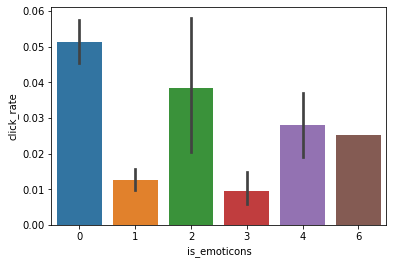

In [100]:
sns.barplot(x=train_df['is_emoticons'],y=train_df['click_rate'])

# Observations:
1. For is_emoticons 0, average number of clicks are maximum.
2. For is_emoticons 3, average number of clicks are minimum.

In [101]:
x=train_df.groupby('is_emoticons')['click_rate'].mean().sort_values(ascending=False).index


In [102]:
y=train_df.groupby('is_emoticons')['click_rate'].mean().sort_values(ascending=False).values


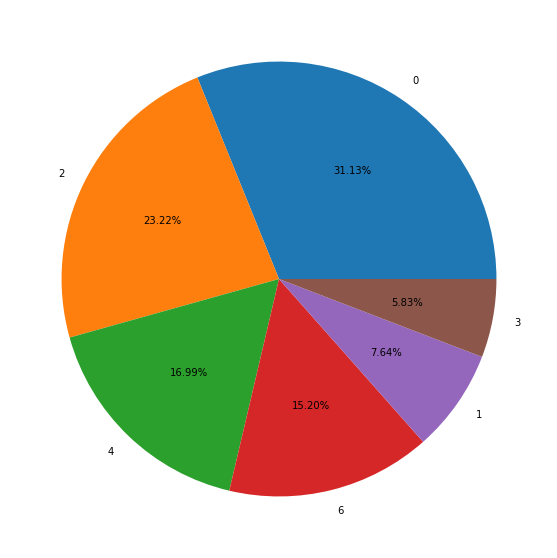

In [103]:
plt.figure(figsize=(10,10))
plt.pie(x=y,labels=x,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='target_audience', ylabel='click_rate'>

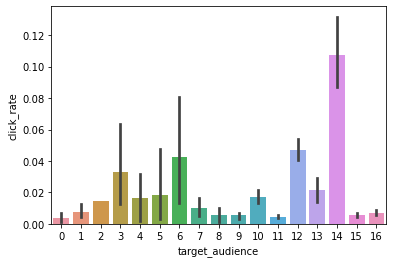

In [104]:
sns.barplot(x=train_df['target_audience'],y=train_df['click_rate'])

# Observations:
1. For target_audience 14, average number of clicks are maximum.
2. For target_audience 0, average number of clicks are minimum.

In [105]:
x=train_df.groupby('target_audience')['click_rate'].mean().sort_values(ascending=False).index


In [106]:
y=train_df.groupby('target_audience')['click_rate'].mean().sort_values(ascending=False).values


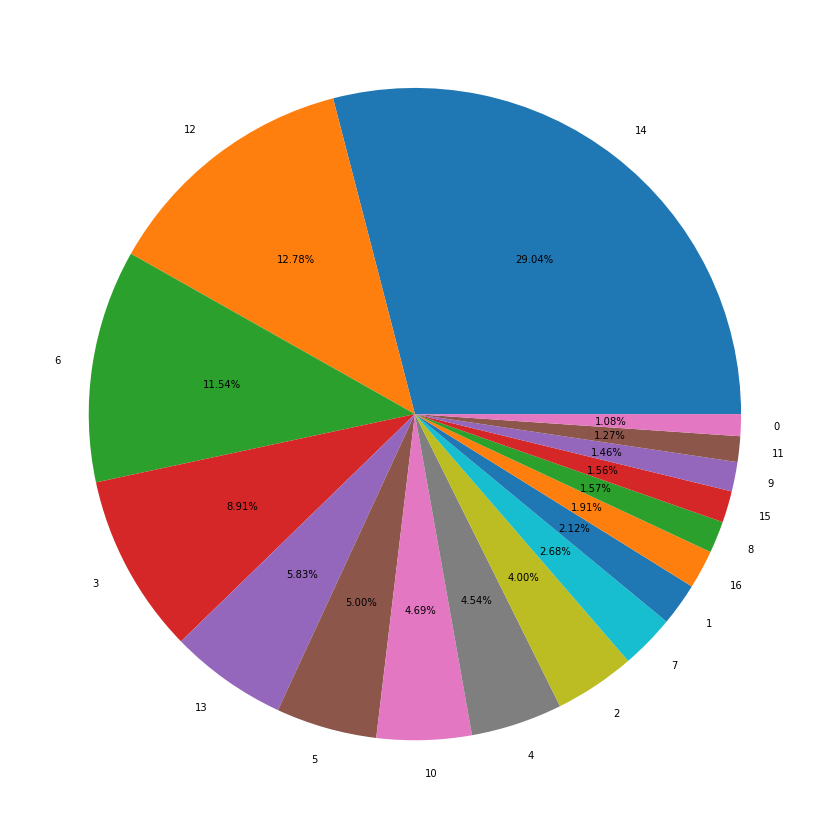

In [107]:
plt.figure(figsize=(15,15))

plt.pie(x=y,labels=x,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='is_urgency', ylabel='click_rate'>

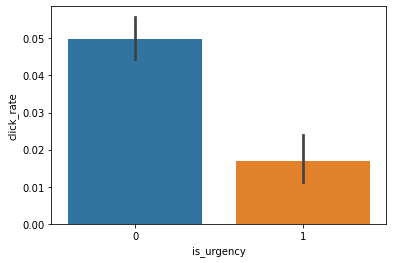

In [108]:
sns.barplot(x=train_df['is_urgency'],y=train_df['click_rate'])

# Observations:
1. For urgency 0, average number of clicks are maximum.
2. For urgency 1, average number of clicks are minimum.

<AxesSubplot:xlabel='is_price', ylabel='click_rate'>

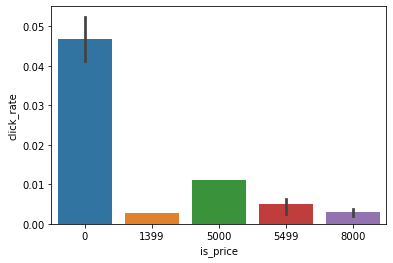

In [109]:
sns.barplot(x=train_df['is_price'],y=train_df['click_rate'])

# Observations:
1. For 0 price, average number of clicks are maximum.
2. For price 1399, average number of clicks are minimum.

<AxesSubplot:xlabel='sender', ylabel='click_rate'>

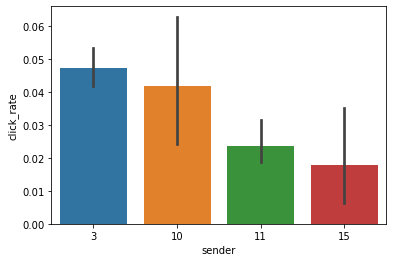

In [110]:
sns.barplot(x=train_df['sender'],y=train_df['click_rate'])

# Observations:
1. For sender 3, average number of clicks are maximum.
2. For sender 15, average number of clicks are minimum.

In [111]:
x=train_df.groupby('sender')['click_rate'].mean().sort_values(ascending=False).index


In [112]:
y=train_df.groupby('sender')['click_rate'].mean().sort_values(ascending=False).values


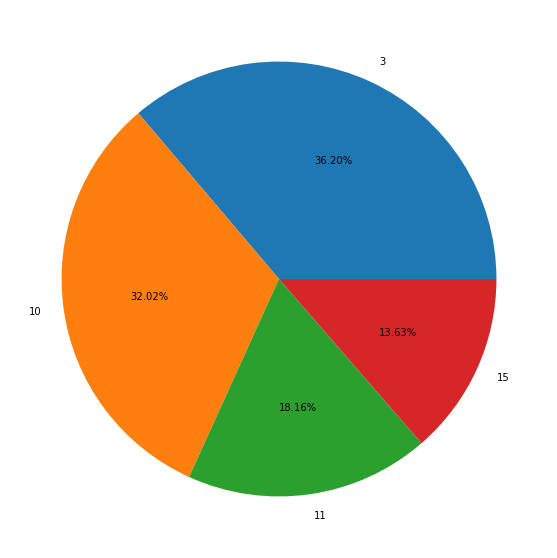

In [113]:
plt.figure(figsize=(10,10))
plt.pie(x=y,labels=x,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='no_of_CTA', ylabel='click_rate'>

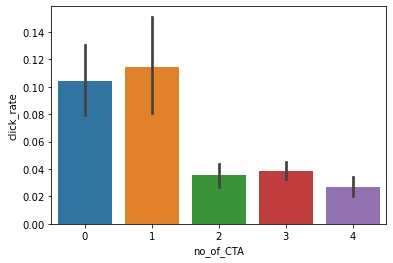

In [114]:
sns.barplot(x=train_df['no_of_CTA'],y=train_df['click_rate'])

# Observations:
1. For no of CTA 1, average number of clicks are maximum.
2. For no of CTA 4, average number of clicks are minimum.

In [115]:
x=train_df.groupby('no_of_CTA')['click_rate'].mean().sort_values(ascending=False).index


In [116]:
y=train_df.groupby('no_of_CTA')['click_rate'].mean().sort_values(ascending=False).values


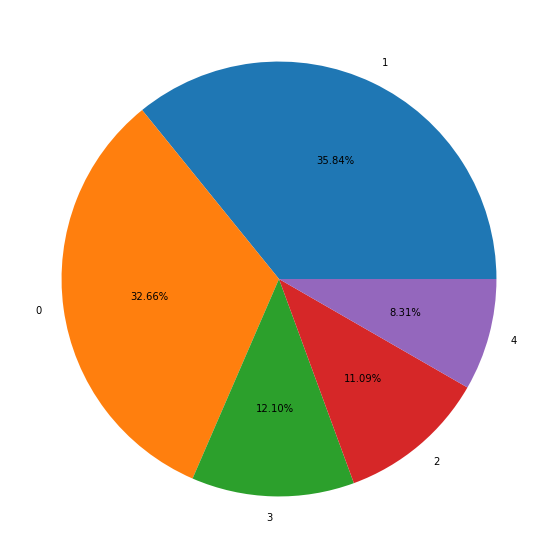

In [117]:
plt.figure(figsize=(10,10))
plt.pie(x=y,labels=x,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='product', ylabel='click_rate'>

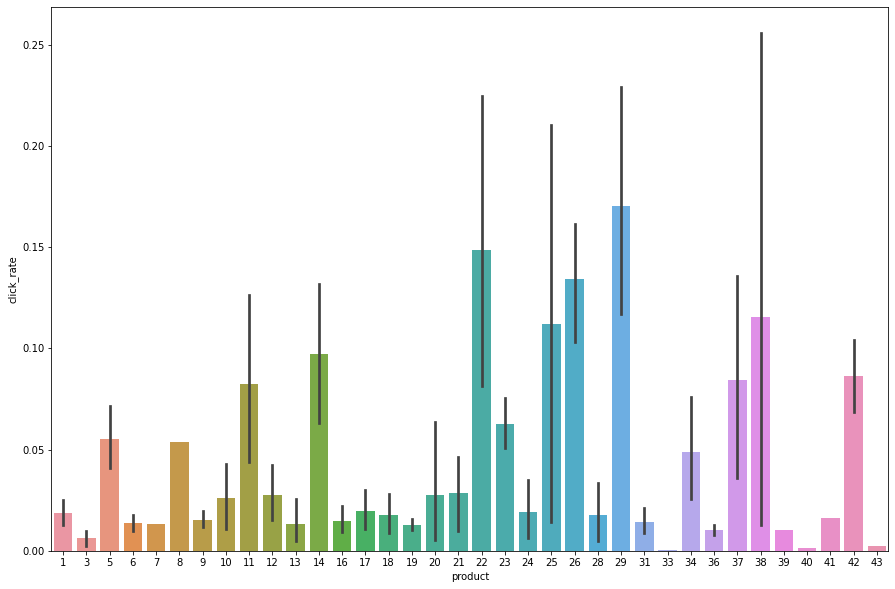

In [118]:
plt.figure(figsize=(15,10))
sns.barplot(x=train_df['product'],y=train_df['click_rate'])

# Observations:
1. For product 29, average number of clicks are maximum.
2. For product 40, average number of clicks are minimum.

<AxesSubplot:xlabel='category', ylabel='click_rate'>

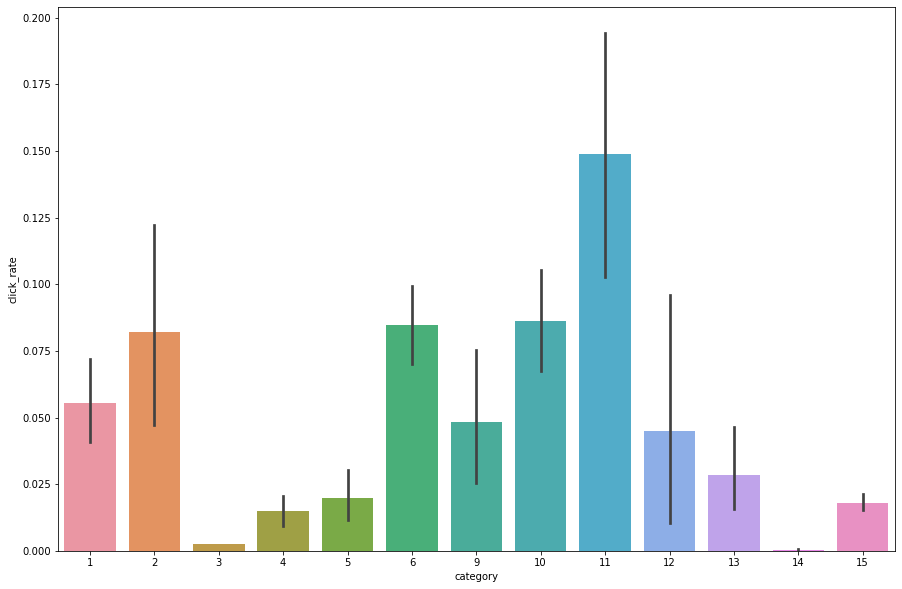

In [119]:
plt.figure(figsize=(15,10))
sns.barplot(x=train_df['category'],y=train_df['click_rate'])

# Observations:
1. For category 11, average number of clicks are maximum.
2. For category 14, average number of clicks are minimum.

In [120]:
x=train_df.groupby('category')['click_rate'].mean().sort_values(ascending=False).index


In [121]:
y=train_df.groupby('category')['click_rate'].mean().sort_values(ascending=False).values


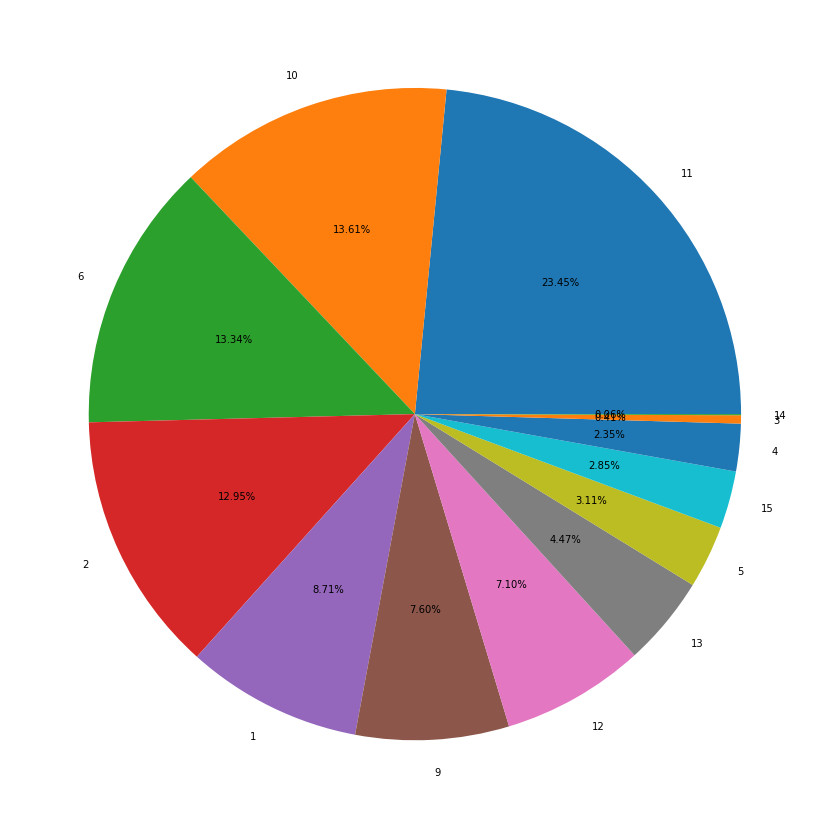

In [122]:
plt.figure(figsize=(15,15))
plt.pie(x=y,labels=x,autopct="%1.2f%%")
plt.show()

In [123]:
train_df

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826
7,8,3,60,12117,17,4,0,Noon,6,26,...,1,0,1,0,0,0,0,0,14,0.166998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,1875,3,74,10596,31,5,1,Noon,2,11,...,2,0,1,0,0,0,0,0,16,0.006033
1876,1877,3,100,9132,19,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,15,0.006598
1879,1880,3,74,10601,31,4,0,Evening,2,11,...,2,0,1,0,0,0,0,0,16,0.004249
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,0,6,0.008289


In [124]:
train_df['click_rate_range']=pd.qcut(train_df['click_rate'],5)


C:\Users\himanshu\AppData\Local\Temp\ipykernel_28100\1108324852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['click_rate_range']=pd.qcut(train_df['click_rate'],5)


In [125]:
train_df

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,click_rate_range
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,14,0.103079,"(0.0634, 0.693]"
2,3,3,59,12801,16,5,1,Noon,2,11,...,0,1,0,0,0,0,0,16,0.002769,"(-0.001, 0.00509]"
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,10,0.010868,"(0.00912, 0.0198]"
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,1,0,0,0,0,0,14,0.142826,"(0.0634, 0.693]"
7,8,3,60,12117,17,4,0,Noon,6,26,...,0,1,0,0,0,0,0,14,0.166998,"(0.0634, 0.693]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,1875,3,74,10596,31,5,1,Noon,2,11,...,0,1,0,0,0,0,0,16,0.006033,"(0.00509, 0.00912]"
1876,1877,3,100,9132,19,4,0,Evening,15,9,...,0,0,0,0,0,0,0,15,0.006598,"(0.00509, 0.00912]"
1879,1880,3,74,10601,31,4,0,Evening,2,11,...,0,1,0,0,0,0,0,16,0.004249,"(-0.001, 0.00509]"
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,6,0.008289,"(0.00509, 0.00912]"


<AxesSubplot:xlabel='click_rate_range', ylabel='count'>

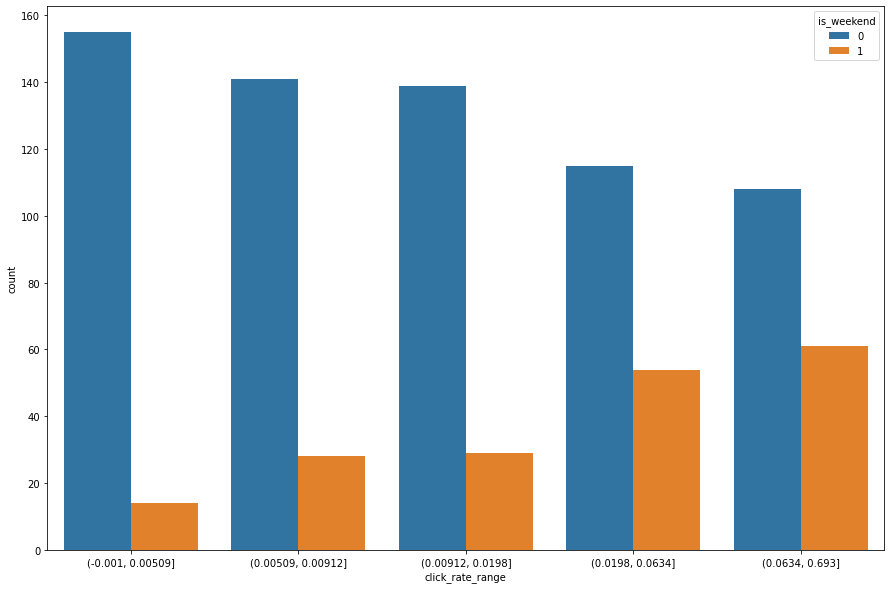

In [126]:
plt.figure(figsize=(15,10))
sns.countplot(x=train_df['click_rate_range'],hue=train_df['is_weekend'])

# Observations:
1. On Weekend maximum click rate is between  0.0634 and 0.693.
2. On Weekday maximum click rate is between  -0.001 and 0.00509.


<AxesSubplot:xlabel='click_rate_range', ylabel='count'>

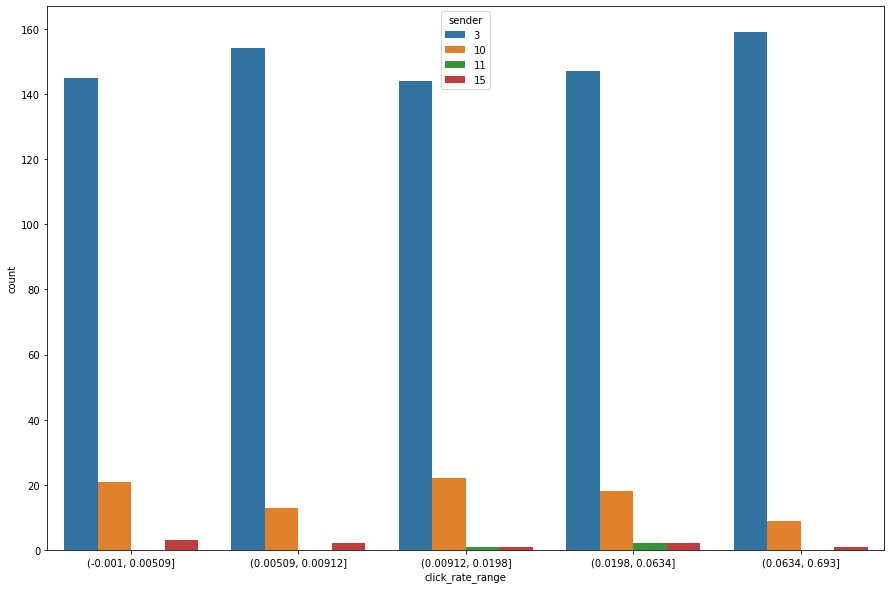

In [127]:
plt.figure(figsize=(15,10))
sns.countplot(x=train_df['click_rate_range'],hue=train_df['sender'])

# Observations:
1. Sender 10 has done maximum click rate between 0.00912 and 0.0198
2. Sender 3 has done maximum click rate between 0.0634 and 0.693
3. Sender 15 has done maximum click rate between -0.001 and 0.00509
4. Sender 11 has done maximum click rate between 0.0198 and 0.0634


<AxesSubplot:xlabel='click_rate_range', ylabel='count'>

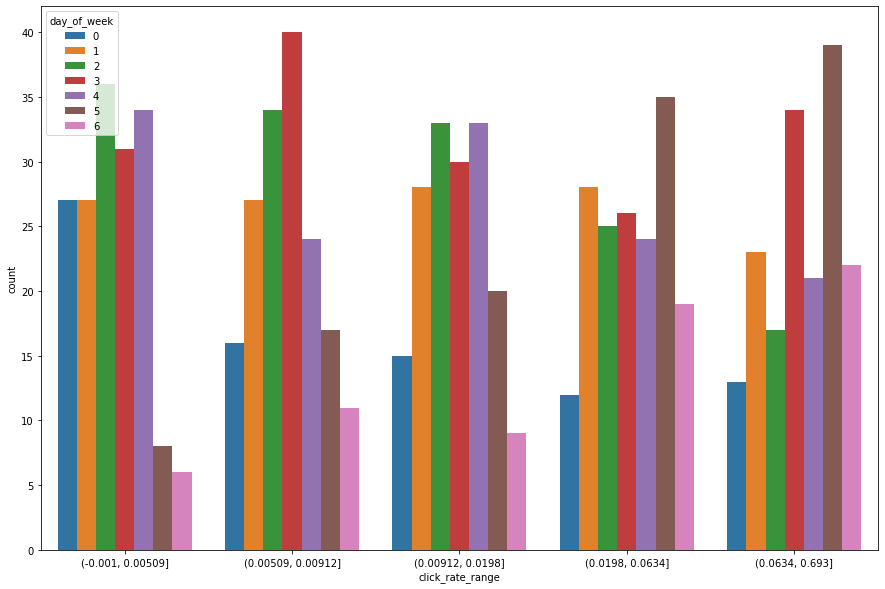

In [128]:
plt.figure(figsize=(15,10))
sns.countplot(x=train_df['click_rate_range'],hue=train_df['day_of_week'])

# Observations:
1. At day of week 3, maximum number of clicks is between 0.00509 and 0.00912.
2. At day of week 5, maximum number of clicks is between 0.0634 and 0.693.
3. At day of week 2, maximum number of clicks is between -0.001 and 0.00509.
4. At day of week 4, maximum number of clicks is between -0.001 and 0.00509.
5. At day of week 0, maximum number of clicks is between -0.001 and 0.00509.
6. At day of week 1, maximum number of clicks is between 0.00912 and 0.0198


<AxesSubplot:xlabel='click_rate_range', ylabel='count'>

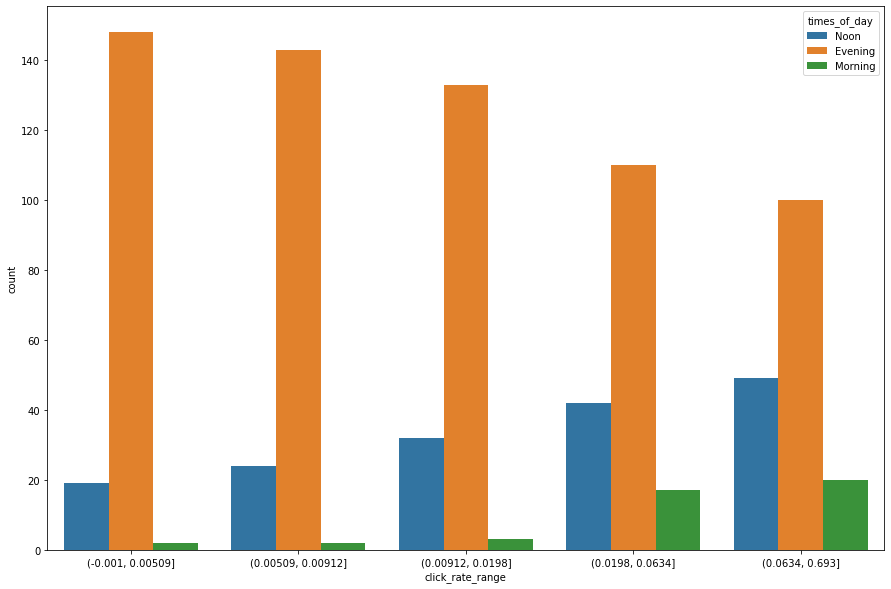

In [129]:
plt.figure(figsize=(15,10))
sns.countplot(x=train_df['click_rate_range'],hue=train_df['times_of_day'])

# Observations:
1. At Evening time, maximum number of clicks is between -0.001 and 0.00509.
2. At Noon time, maximum number of clicks is between 0.0634 and 0.693
3. At Morning time, maximum number of clicks is between 0.0634 and 0.693

<AxesSubplot:xlabel='click_rate_range', ylabel='count'>

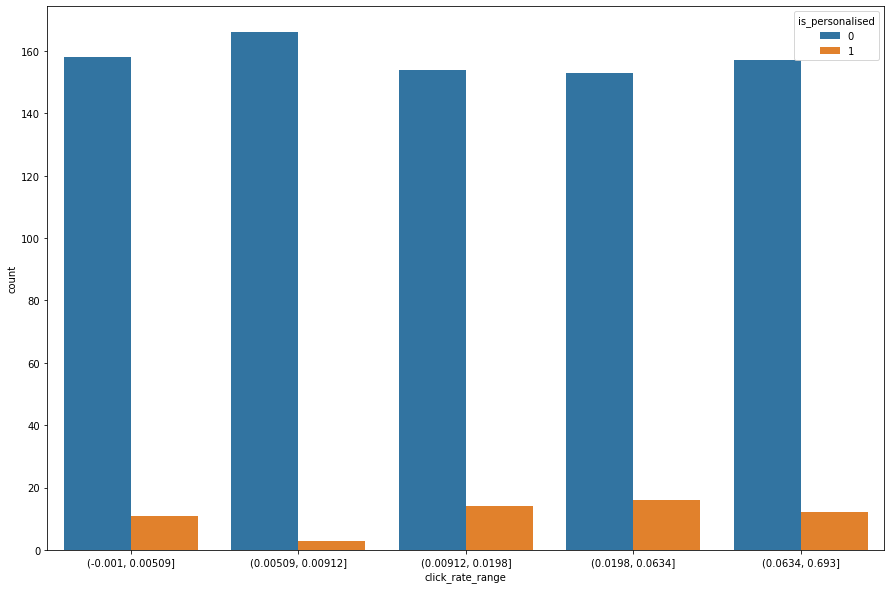

In [130]:
plt.figure(figsize=(15,10))
sns.countplot(x=train_df['click_rate_range'],hue=train_df['is_personalised'])

<AxesSubplot:xlabel='click_rate_range', ylabel='count'>

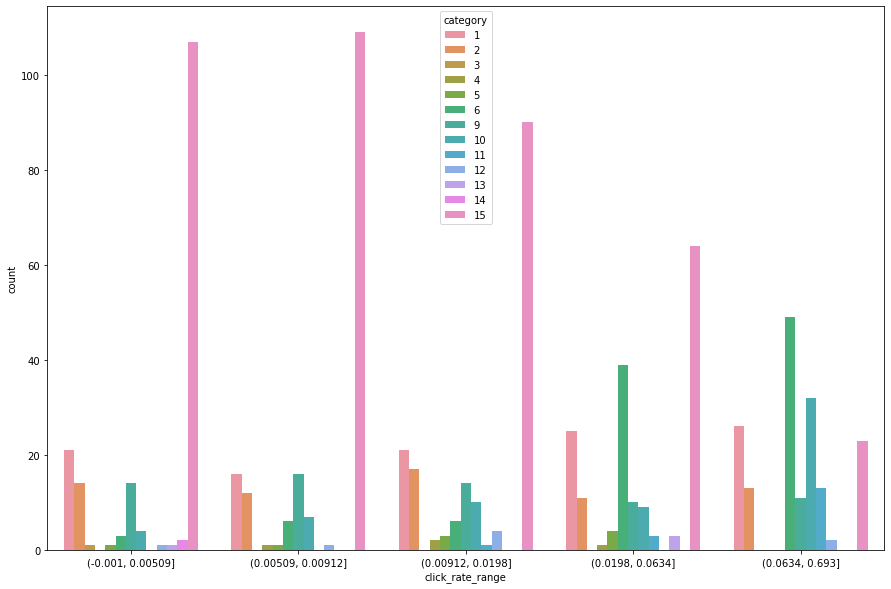

In [131]:
plt.figure(figsize=(15,10))
sns.countplot(x=train_df['click_rate_range'],hue=train_df['category'])

# Observations:
1. At Category 15, maximum number of clicks is between 0.00509 and 0.00912.
2. At Category 6, maximum number of clicks is between 0.0634 and 0.693

<AxesSubplot:xlabel='click_rate_range', ylabel='count'>

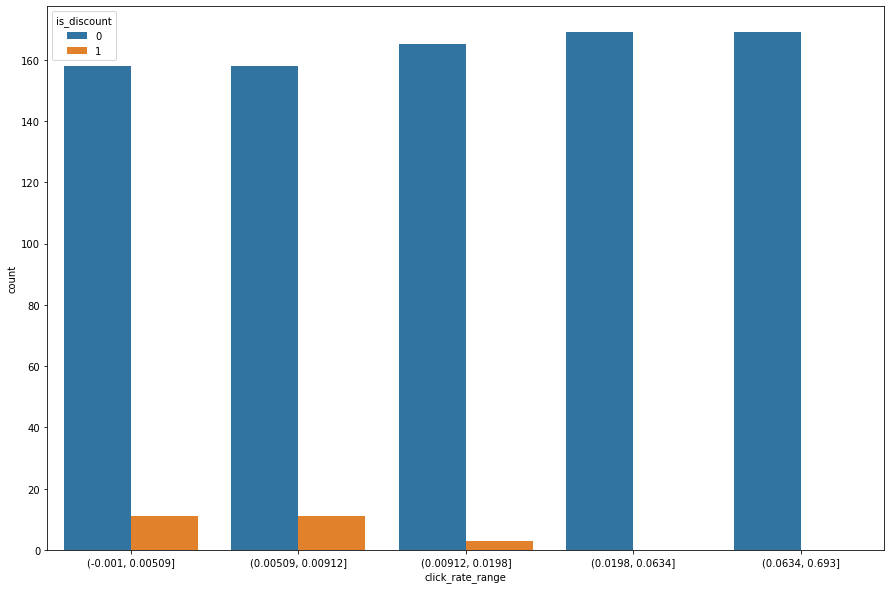

In [132]:
plt.figure(figsize=(15,10))
sns.countplot(x=train_df['click_rate_range'],hue=train_df['is_discount'])

# Observations:
1. Maximum click rate  for is_discount true is in the range between 0.00509 and 0.00912.
2. Maximum click rate  for is_discount false is in the range between 0.0634 and 0.693.

<AxesSubplot:xlabel='click_rate_range', ylabel='count'>

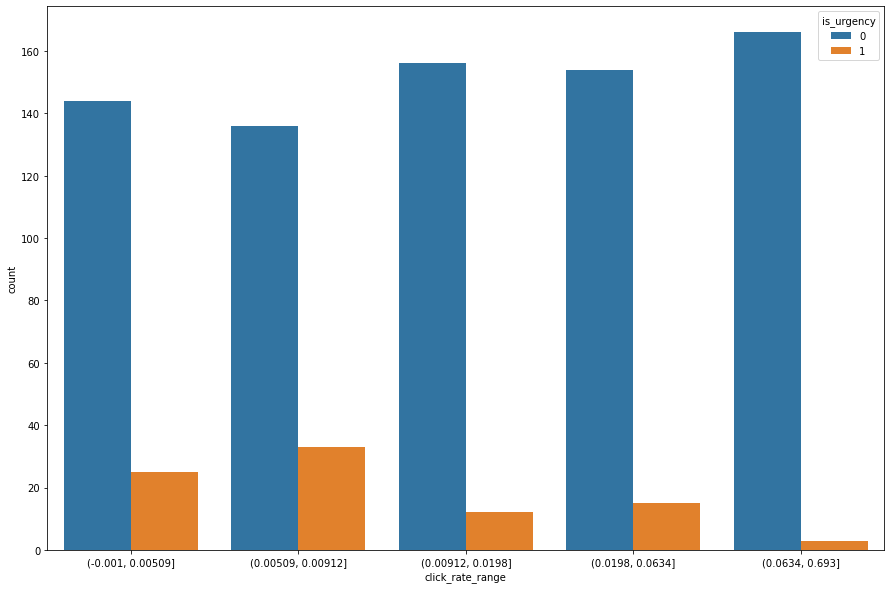

In [133]:
plt.figure(figsize=(15,10))
sns.countplot(x=train_df['click_rate_range'],hue=train_df['is_urgency'])

# Observations:
1. Maximum click rate  for is_urgency true is in the range between 0.00509 and 0.00912.
2. Maximum click rate  for is_urgency false is in the range between 0.0634 and 0.693.



<AxesSubplot:xlabel='click_rate_range', ylabel='count'>

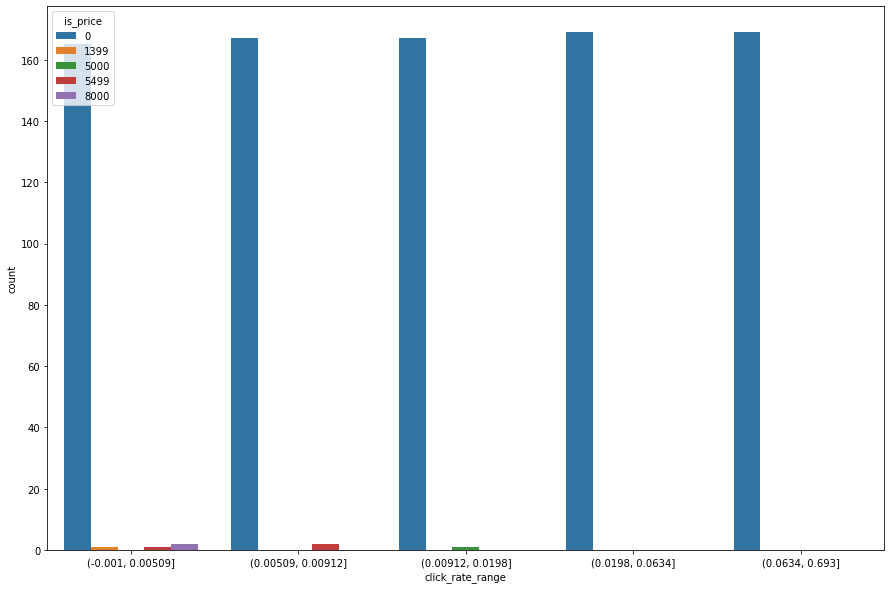

In [134]:
plt.figure(figsize=(15,10))
sns.countplot(x=train_df['click_rate_range'],hue=train_df['is_price'])

# Observations:
1. Maximum click rate  for is_price 0 is maximum in the range between 0.0634 and 0.693.

<AxesSubplot:xlabel='click_rate_range', ylabel='count'>

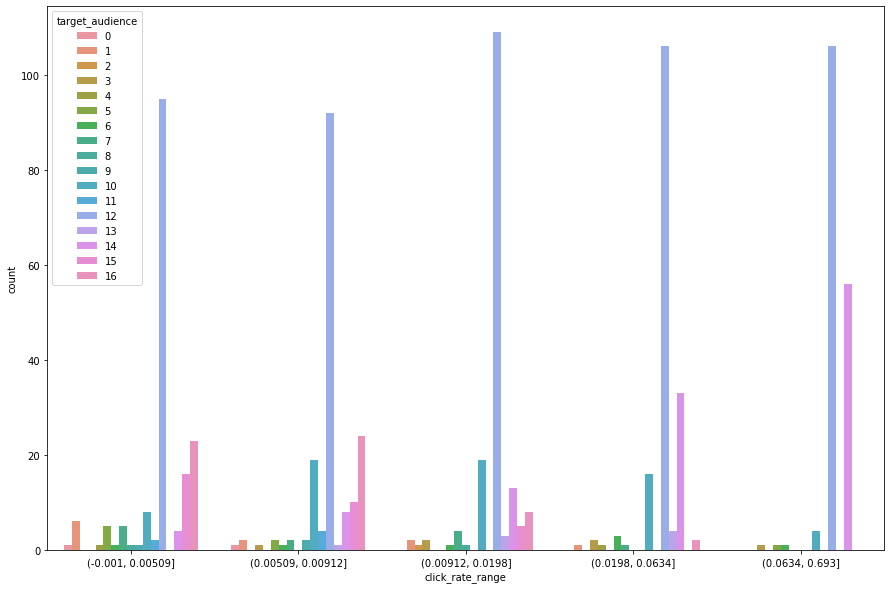

In [135]:
plt.figure(figsize=(15,10))
sns.countplot(x=train_df['click_rate_range'],hue=train_df['target_audience'])

In [136]:
train_df

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,click_rate_range
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,14,0.103079,"(0.0634, 0.693]"
2,3,3,59,12801,16,5,1,Noon,2,11,...,0,1,0,0,0,0,0,16,0.002769,"(-0.001, 0.00509]"
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,10,0.010868,"(0.00912, 0.0198]"
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,1,0,0,0,0,0,14,0.142826,"(0.0634, 0.693]"
7,8,3,60,12117,17,4,0,Noon,6,26,...,0,1,0,0,0,0,0,14,0.166998,"(0.0634, 0.693]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,1875,3,74,10596,31,5,1,Noon,2,11,...,0,1,0,0,0,0,0,16,0.006033,"(0.00509, 0.00912]"
1876,1877,3,100,9132,19,4,0,Evening,15,9,...,0,0,0,0,0,0,0,15,0.006598,"(0.00509, 0.00912]"
1879,1880,3,74,10601,31,4,0,Evening,2,11,...,0,1,0,0,0,0,0,16,0.004249,"(-0.001, 0.00509]"
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,6,0.008289,"(0.00509, 0.00912]"


<AxesSubplot:xlabel='subject_len', ylabel='click_rate'>

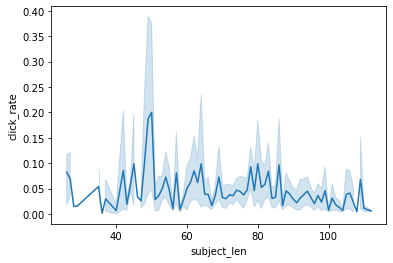

In [137]:
sns.lineplot(x=train_df['subject_len'],y=train_df['click_rate'])

# Observations:
1. click rate is maximum when subject length is between 40 and 60

<AxesSubplot:xlabel='body_len', ylabel='click_rate'>

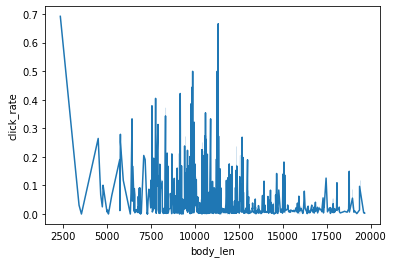

In [138]:
sns.lineplot(x=train_df['body_len'],y=train_df['click_rate'])

# Observations:
1. click rate is maximum when body len is less than 2500

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='campaign_id', ylabel='Density'>

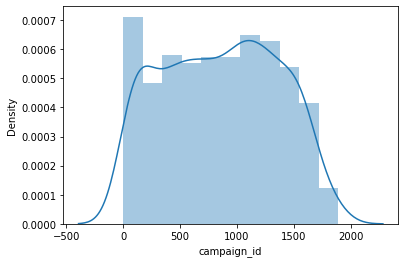

In [139]:
sns.distplot(train_df['campaign_id'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sender', ylabel='Density'>

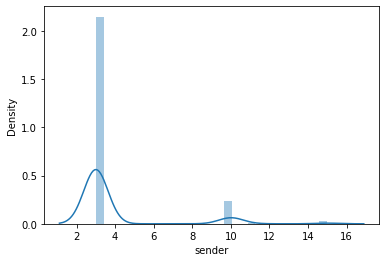

In [140]:
sns.distplot(train_df['sender'])

In [141]:
train_df['sender']=np.log(train_df['sender'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_28100\1299991553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['sender']=np.log(train_df['sender'])


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sender', ylabel='Density'>

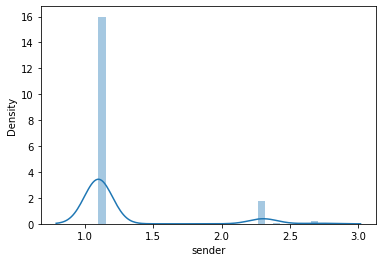

In [142]:
sns.distplot(train_df['sender'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='body_len', ylabel='Density'>

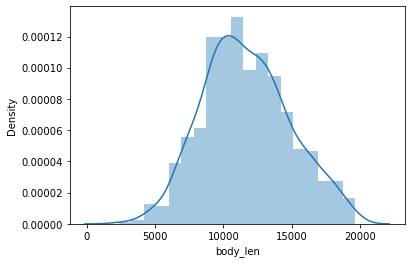

In [143]:
sns.distplot(train_df['body_len'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean_paragraph_len', ylabel='Density'>

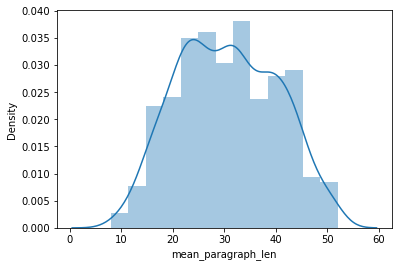

In [144]:
sns.distplot(train_df['mean_paragraph_len'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='day_of_week', ylabel='Density'>

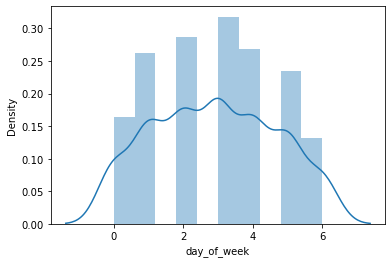

In [145]:
sns.distplot(train_df['day_of_week'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='is_weekend', ylabel='Density'>

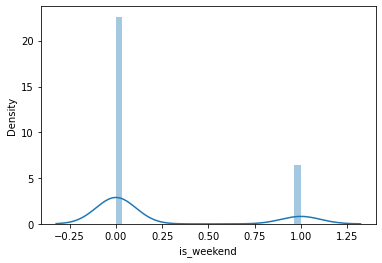

In [146]:
sns.distplot(train_df['is_weekend'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='product', ylabel='Density'>

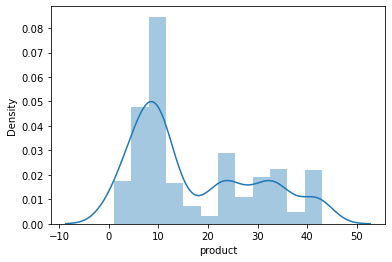

In [147]:
sns.distplot(train_df['product'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='category', ylabel='Density'>

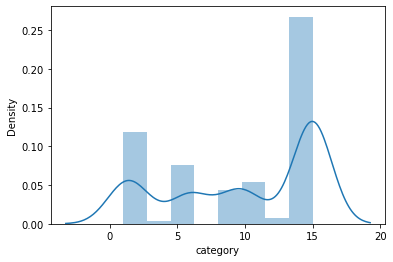

In [148]:
sns.distplot(train_df['category'])

In [149]:
le=LabelEncoder()


In [150]:
train_df['times_of_day']=le.fit_transform(train_df['times_of_day'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_28100\2342448918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['times_of_day']=le.fit_transform(train_df['times_of_day'])


In [151]:
train_df.drop('click_rate_range',axis=1,inplace=True)

C:\Users\himanshu\AppData\Local\Temp\ipykernel_28100\1280556570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop('click_rate_range',axis=1,inplace=True)


<AxesSubplot:>

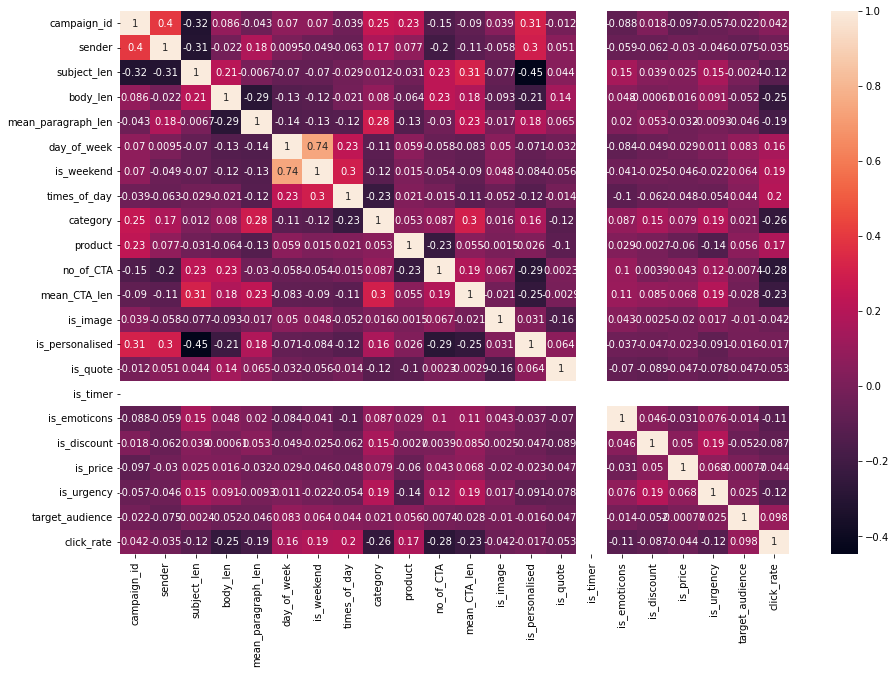

In [152]:
plt.figure(figsize=(15,10))
sns.heatmap(train_df.corr(),annot=True)


In [153]:
y=train_df['click_rate']

In [154]:
X=train_df.drop(['click_rate','day_of_week','campaign_id'],axis=1)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [156]:
X_test.shape

(169, 19)

In [157]:
y_test.shape

(169,)

In [158]:
X_train.shape

(675, 19)

In [159]:
rfr=RandomForestRegressor()


In [160]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [161]:
y_pred=rfr.predict(X_test)


In [162]:
r2_score(y_test,y_pred)

0.5700138422471119

In [163]:
mean_squared_error(y_test,y_pred)

0.0036294211928503692